In [3]:
import os
import numpy as np
import pandas as pd
import rasterio as rio
from rasterio.plot import plotting_extent
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")

dtm_path = '/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif'
dsm_path = '/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif'
with rio.open(dtm_path) as src:
    lidar_dtm_im = src.read(1, masked=True)
    spatial_extent = plotting_extent(src)

with rio.open(dsm_path) as src:
    lidar_dsm_im = src.read(1, masked=True)
    spatial_extent = plotting_extent(src)

lidar_chm_im = lidar_dsm_im - lidar_dtm_im
lidar_chm_im



masked_array(
  data=[[--, --, --, ..., 0.0, 0.1700439453125, 0.9600830078125],
        [--, --, --, ..., 0.0, 0.090087890625, 1.6400146484375],
        [--, --, --, ..., 0.0, 0.0, 0.0799560546875],
        ...,
        [--, --, --, ..., 0.0, 0.0, 0.0],
        [--, --, --, ..., 0.0, 0.0, 0.0],
        [--, --, --, ..., 0.0, 0.0, 0.0]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.402823e+38,
  dtype=float32)

In [4]:
# View min and max values in the data
print('CHM min value:', lidar_chm_im.min())
print('CHM max value:', lidar_chm_im.max())


CHM min value: 0.0
CHM max value: 26.930054


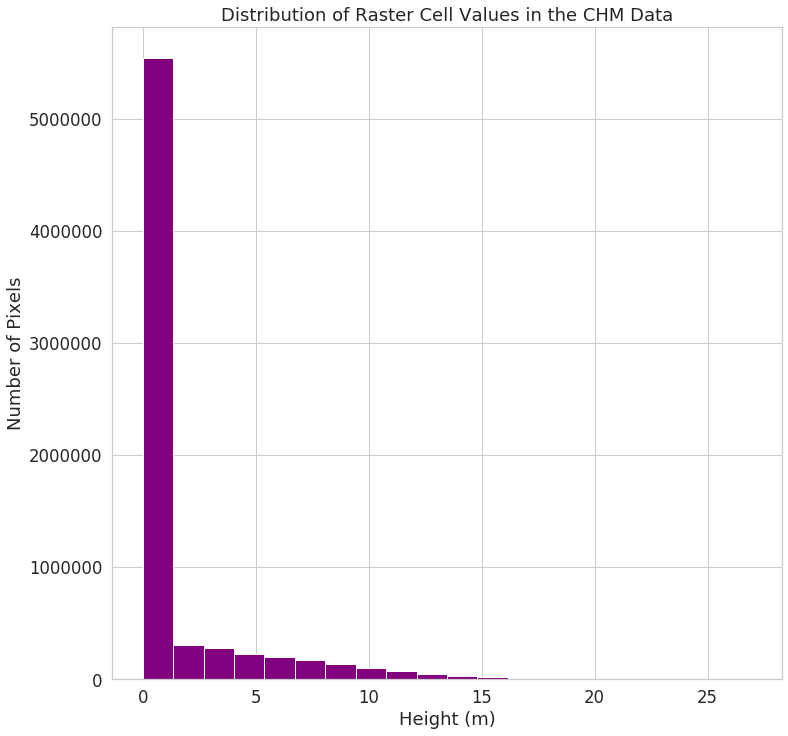

In [5]:
ep.hist(lidar_chm_im.ravel(),
        title="Distribution of Raster Cell Values in the CHM Data",
        xlabel="Height (m)",
        ylabel="Number of Pixels")
plt.show()


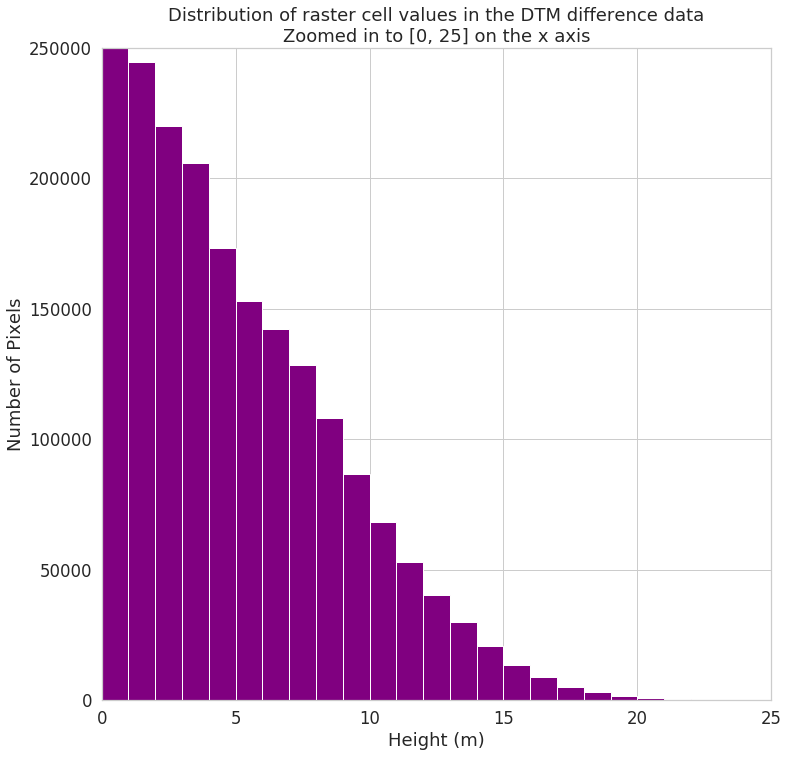

In [6]:
xlim = [0, 25]
f, ax = ep.hist(lidar_chm_im.ravel(),
                hist_range=xlim,
                bins=range(*xlim),
                ylabel="Number of Pixels", xlabel="Height (m)",
                title="Distribution of raster cell values in the DTM difference data\nZoomed in to {} on the x axis".format(xlim))
ax.set(xlim=xlim, ylim=[0, 250000])
plt.show()

In [7]:
# Patches = the matplotlib objects drawn
counts, bins = np.histogram(lidar_chm_im,
                            bins=50, range=xlim)


# Print histogram outputs
print("counts:", counts)
print("bins:", bins)


counts: [5292785  155317  128037  116551  109743  110395  107528   98579   89234
   83947   79123   73934   71669   70521   67043   61639   56389   51932
   46193   40674   36442   31877   28428   24553   21620   18613   16095
   13776   11424    9402    7504    6195    4883    3901    2954    2306
    1776    1342    1027     706     525     358     271     160     113
      99      47      44      21      16]
bins: [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25. ]


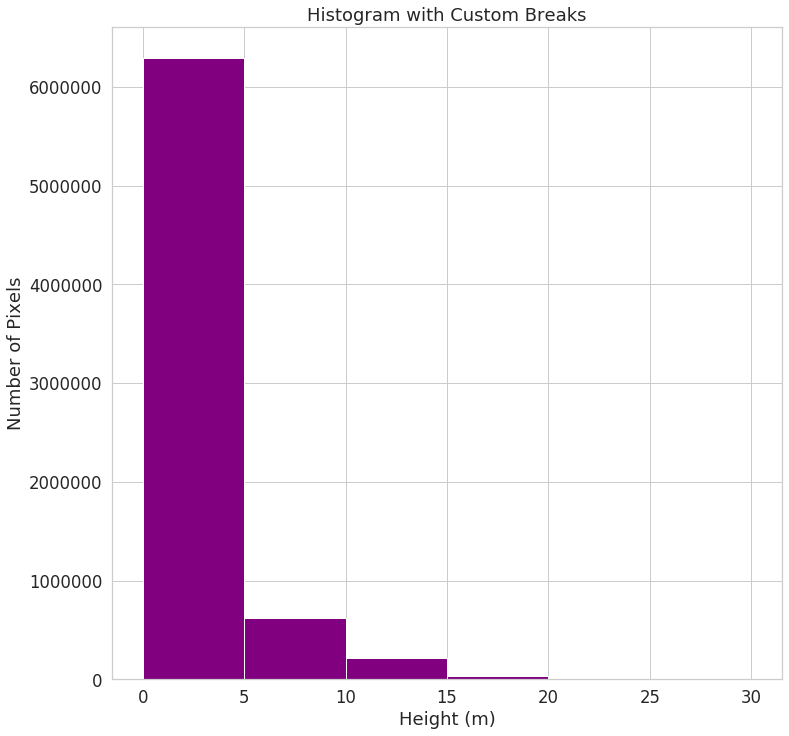

In [8]:
ep.hist(lidar_chm_im.ravel(),
        bins=[0, 5, 10, 15, 20, 30],
        title="Histogram with Custom Breaks",
        xlabel="Height (m)", ylabel="Number of Pixels")
plt.show()


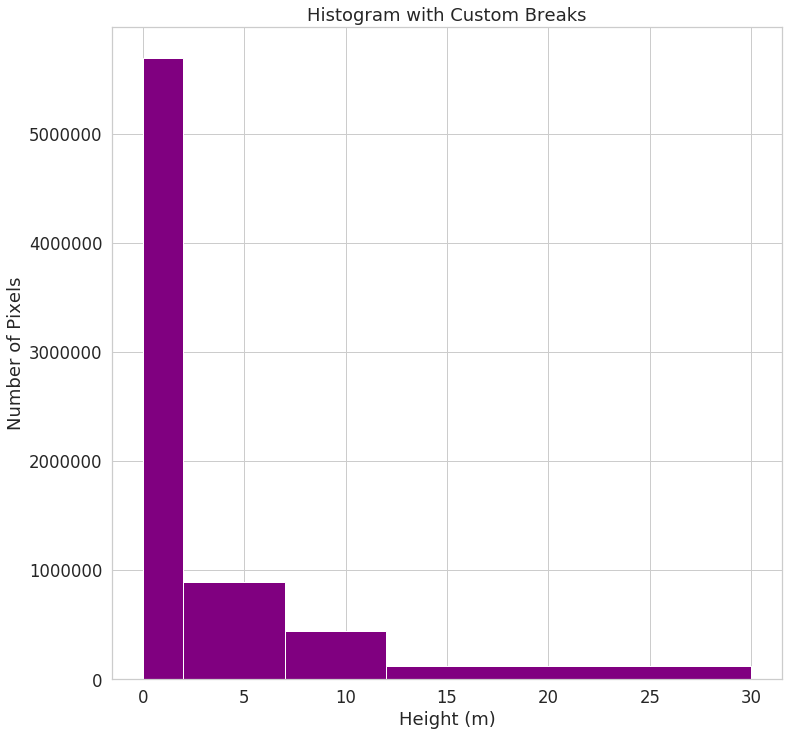

In [9]:
ep.hist(lidar_chm_im.ravel(),
        colors='purple',
        bins=[0, 2, 7, 12, 30],
        title="Histogram with Custom Breaks",
        xlabel="Height (m)",
        ylabel="Number of Pixels")
plt.show()


In [10]:
# View the fill value for your array
lidar_chm_im.fill_value


-3.402823e+38

In [11]:
# Define bins that you want, and then classify the data
class_bins = [lidar_chm_im.min(), 2, 7, 12, np.inf]

# You'll classify the original image array, then unravel it again for plotting
lidar_chm_im_class = np.digitize(lidar_chm_im, class_bins)

# Note that you have an extra class in the data (0)
print(np.unique(lidar_chm_im_class))


[0 1 2 3 4]


In [12]:
# Reassign all values that are classified as 0 to masked (no data value)
# This will prevent pixels that == 0 from being rendered on a map in matplotlib
lidar_chm_class_ma = np.ma.masked_where(lidar_chm_im_class == 0,
                                        lidar_chm_im_class,
                                        copy=True)
lidar_chm_class_ma


masked_array(
  data=[[--, --, --, ..., 1, 1, 1],
        [--, --, --, ..., 1, 1, 1],
        [--, --, --, ..., 1, 1, 1],
        ...,
        [--, --, --, ..., 1, 1, 1],
        [--, --, --, ..., 1, 1, 1],
        [--, --, --, ..., 1, 1, 1]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=999999)

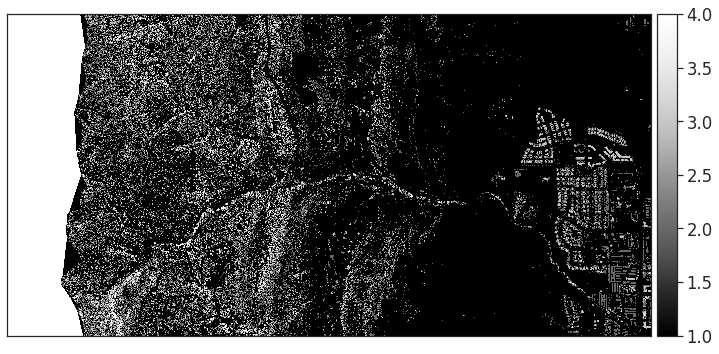

In [17]:
sns.set_style("white")
# Plot newly classified and masked raster
ep.plot_bands(lidar_chm_class_ma,
              scale=False)
plt.show()

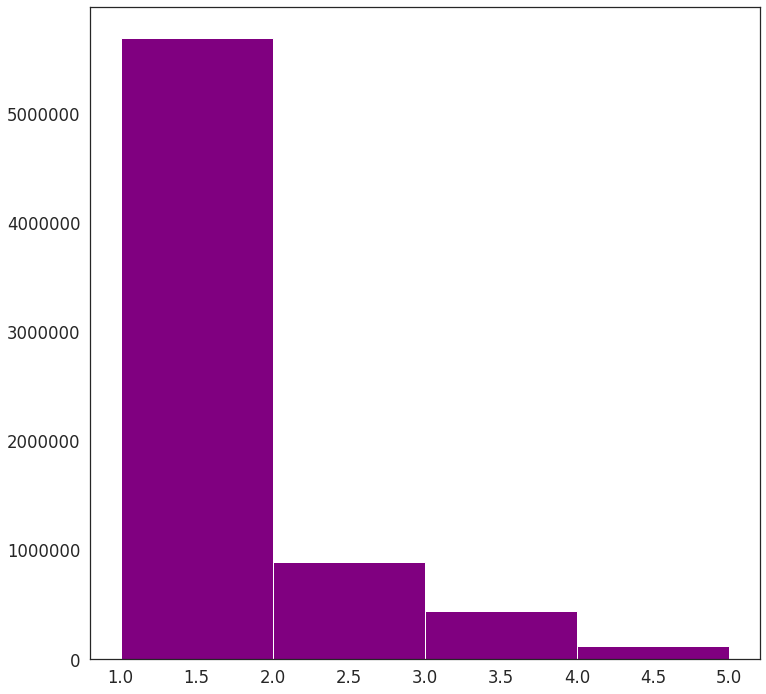

In [22]:
ep.hist(lidar_chm_class_ma.ravel(),
       bins=[1,2,3,4,5])

plt.show()

In [23]:
np.unique(lidar_chm_class_ma)


masked_array(data=[1, 2, 3, 4, --],
             mask=[False, False, False, False,  True],
       fill_value=999999)

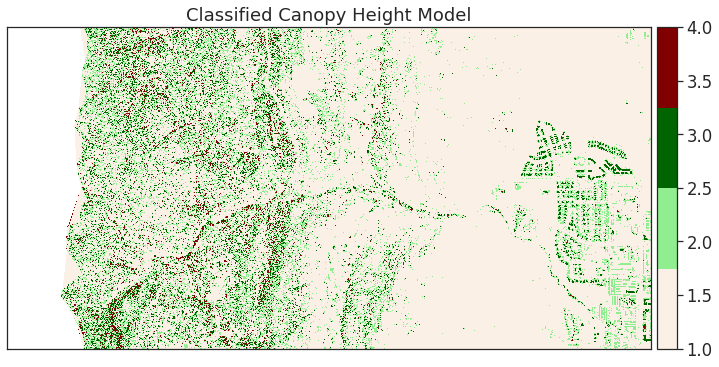

In [24]:
colors = ['linen', 'lightgreen', 'darkgreen', 'maroon']

cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins, len(colors))

ep.plot_bands(lidar_chm_class_ma,
              cmap=cmap,
              title="Classified Canopy Height Model",
              scale=False)
plt.show()

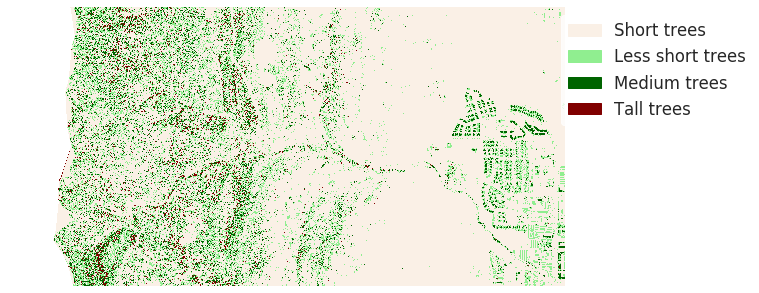

In [25]:
# Create a list of labels to use for your legend
height_class_labels = ["Short trees",
                       "Less short trees", "Medium trees", "Tall trees"]
# A path is an object drawn by matplotlib. In this case a patch is a box draw on your legend
# Below you create a unique path or box with a unique color - one for each of the labels above
legend_patches = [Patch(color=icolor, label=label)
                  for icolor, label in zip(colors, height_class_labels)]

cmap = ListedColormap(colors)

fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_bands(lidar_chm_class_ma,
              cmap=cmap,
              ax=ax,
              cbar=False)
ax.legend(handles=legend_patches,
          facecolor="white",
          edgecolor="white",
          bbox_to_anchor=(1.35, 1))  # Place legend to the RIGHT of the map
ax.set_axis_off()


In [28]:
dtm_path_post = '/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif'
dsm_path_post = '/home/marta/PycharmProjects/Earth analytics/spatial/boulder-leehill-rd/post-flood/lidar/post_DSM.tif'
with rio.open(dtm_path_post) as src:
    lidar_dtm_im_post = src.read(1, masked=True)
    spatial_extent = plotting_extent(src)

with rio.open(dsm_path_post) as src:
    lidar_dsm_im_post = src.read(1, masked=True)
    spatial_extent = plotting_extent(src)

lidar_chm_im_post = lidar_dsm_im_post - lidar_dtm_im_post
lidar_chm_im_post

masked_array(
  data=[[0.02001953125, 0.0, 0.0, ..., 0.0, 0.0, 0.9801025390625],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 1.4000244140625],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        ...,
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0400390625, 0.0, 0.0, ..., 0.0, 0.0, 0.0]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=-3.4028235e+38,
  dtype=float32)

In [29]:
print('CHM min value:', lidar_chm_im_post.min())
print('CHM max value:', lidar_chm_im_post.max())

CHM min value: 0.0
CHM max value: 27.439941


In [36]:
diff_chm = lidar_chm_im_post - lidar_chm_im
print('CHM min value:', diff_chm.min())
print('CHM max value:', diff_chm.max())


CHM min value: -23.429932
CHM max value: 24.45996


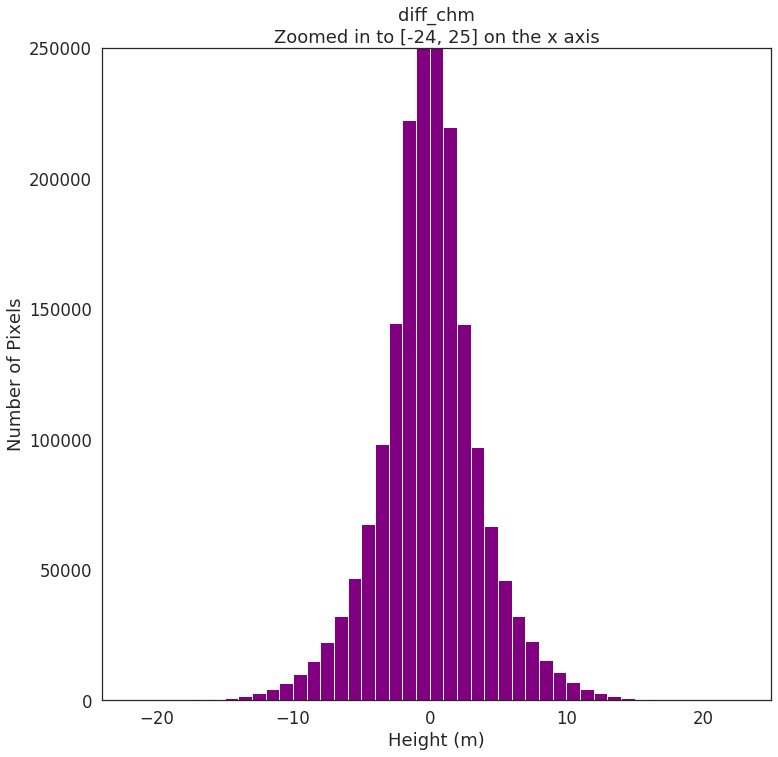

In [40]:
xlim = [-24, 25]
f, ax = ep.hist(diff_chm.ravel(),
                hist_range=xlim,
                bins=range(*xlim),
                ylabel="Number of Pixels", xlabel="Height (m)",
                title="diff_chm\nZoomed in to {} on the x axis".format(xlim))
ax.set(xlim=xlim, ylim=[0, 250000])
plt.show()

In [41]:
diff_chm.fill_value


-3.4028235e+38

In [43]:
# Define bins that you want, and then classify the data
class_bins_diff = [diff_chm.min(), -0.5, 0.5, np.inf]

# You'll classify the original image array, then unravel it again for plotting
lidar_chm_im_class_diff = np.digitize(diff_chm, class_bins_diff)

# Note that you have an extra class in the data (0)
print(np.unique(lidar_chm_im_class_diff))

[1 2 3]


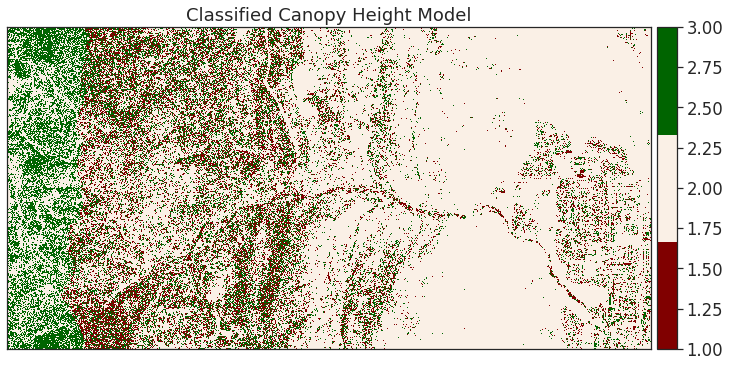

In [46]:
colors = ['maroon', 'linen', 'darkgreen']

cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins, len(colors))

ep.plot_bands(lidar_chm_im_class_diff,
              cmap=cmap,
              title="Classified Canopy Height Model",
              scale=False)
plt.show()

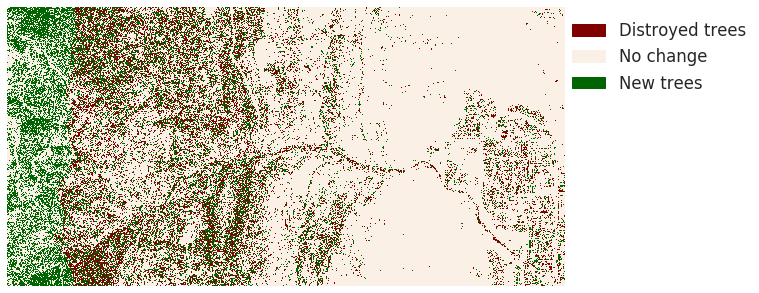

In [50]:
# Create a list of labels to use for your legend
height_class_labels_diff = ["Distroyed trees","No change", "New trees"]
# A path is an object drawn by matplotlib. In this case a patch is a box draw on your legend
# Below you create a unique path or box with a unique color - one for each of the labels above
legend_patches_diff = [Patch(color=icolor, label=label)
                  for icolor, label in zip(colors, height_class_labels_diff)]

cmap = ListedColormap(colors)

fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_bands(lidar_chm_im_class_diff,
              cmap=cmap,
              ax=ax,
              cbar=False)
ax.legend(handles=legend_patches_diff,
          facecolor="white",
          edgecolor="white",
          bbox_to_anchor=(1.35, 1))  # Place legend to the RIGHT of the map
ax.set_axis_off()